In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
train_path ='/content/drive/MyDrive/MLOM/Training_data'
test_path = '/content/drive/MyDrive/MLOM/Testing_data'

# Cat vs Dog Image Classification Using CNN
### This is a simple convolutional neural network which classifies cat vs dog images using the given dataset.

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
#define the model
model = tf.keras.Sequential([
    #there are 5 convolutional layers to extract features
    tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    #convert 2D matrices into a 1D matrix, that can be used as the input for the fully connected layer
    tf.keras.layers.Flatten(),
    #hiiden layer
    tf.keras.layers.Dense(512,activation='relu'),
    #output layer
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [5]:
#data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_path,target_size=(300,300),batch_size=32,class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_path,target_size=(300,300),batch_size=32,class_mode='binary')

Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
#compile the model
from keras.src.metrics import binary_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss=binary_crossentropy,metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 32)        0

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=20,   # number of batches per epoch 633/32
    epochs=5,
    validation_data = test_set,
    validation_steps = 7
)

Epoch 1/5
20/20 [==============================] - 393s 20s/step - loss: 0.6735 - accuracy: 0.6082 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 57s 3s/step - loss: 0.6537 - accuracy: 0.6066 - val_loss: 0.7057 - val_accuracy: 0.5000
Epoch 3/5
20/20 [==============================] - 52s 3s/step - loss: 0.6462 - accuracy: 0.6130 - val_loss: 0.6714 - val_accuracy: 0.5800
Epoch 4/5
20/20 [==============================] - 53s 3s/step - loss: 0.6218 - accuracy: 0.6288 - val_loss: 0.8598 - val_accuracy: 0.5000
Epoch 5/5
20/20 [==============================] - 56s 3s/step - loss: 0.6133 - accuracy: 0.6730 - val_loss: 0.6565 - val_accuracy: 0.6350


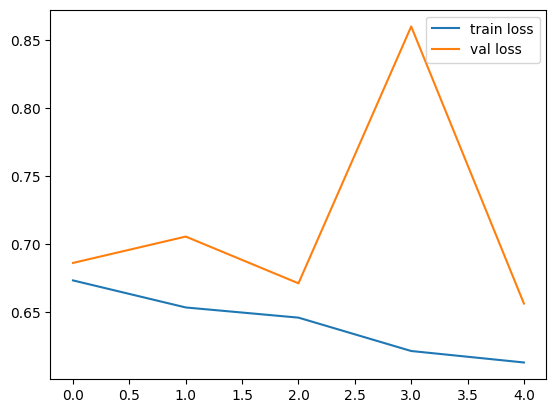

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
#plot the loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

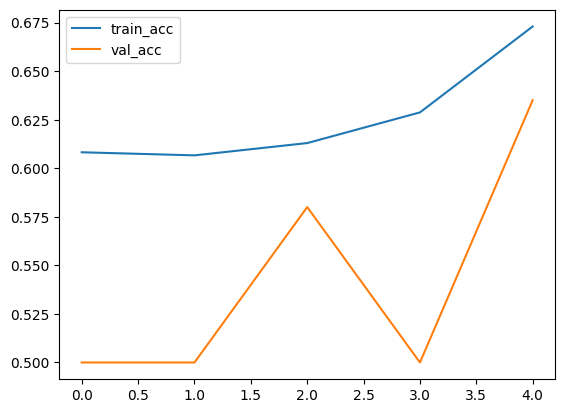

<Figure size 640x480 with 0 Axes>

In [10]:
#plot the accuracy
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')